<a href="https://colab.research.google.com/github/aiaaee/DigitsRecognition/blob/main/Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from sklearn.datasets import load_digits
import torch
import torchvision as torchvision
import torchvision.transforms as transforms
from torchvision.transforms import CenterCrop
from torchvision.transforms import Normalize
from torchvision.transforms import v2
from torchvision.transforms import ToTensor
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.semi_supervised import LabelSpreading
from torch.utils.data import Dataset , DataLoader
import torch.nn as nn
from tqdm import tqdm

In [2]:
digits = load_digits()
Display_model = digits
df = pd.DataFrame(data=Display_model.data, columns=Display_model.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
X , y = digits.data , digits.target

In [4]:
print(X.shape , y.shape)

(1797, 64) (1797,)


In [5]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [6]:
print(X_train.shape , y_train.shape)

(1437, 64) (1437,)


In [21]:
from sklearn.metrics import confusion_matrix
Logreg = LogisticRegression()
Logreg.fit(X_train , y_train.astype(int))
score = Logreg.score(X_test, y_test)
y_pred = Logreg.predict(X_test)

conf_mat = confusion_matrix(y_test.astype(int) , y_pred.astype(int))
print(conf_mat)

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


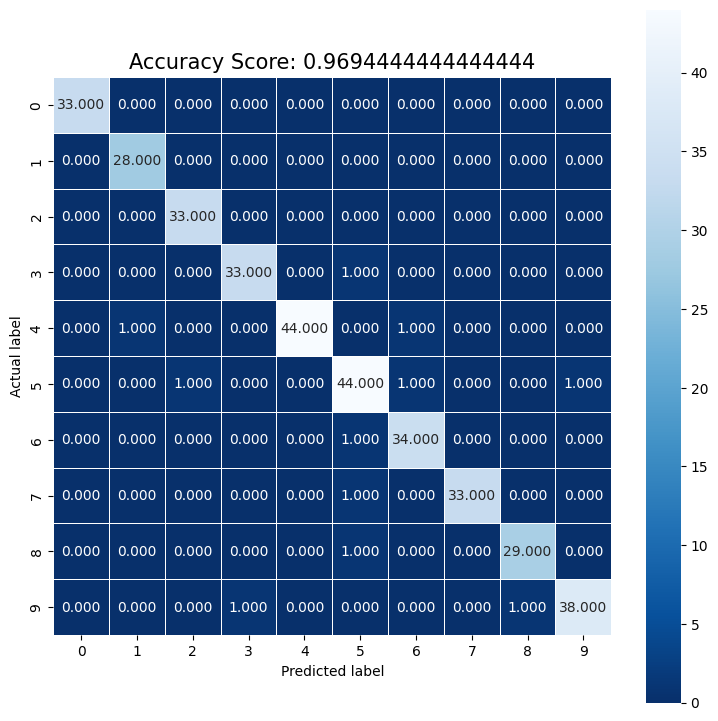

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();

In [ ]:
# images = digits.images
# X = np.reshape(images, (len(images), -1))
# connectivity = grid_to_graph(*images[0].shape)

# agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=32)

# agglo.fit(X)
# X_reduced = agglo.transform(X)

# X_restored = agglo.inverse_transform(X_reduced)
# images_restored = np.reshape(X_restored, images.shape)
# plt.figure(1, figsize=(4, 3.5))
# plt.clf()
# plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.91)
# for i in range(4):
#     plt.subplot(3, 4, i + 1)
#     plt.imshow(images[i], cmap=plt.cm.gray, vmax=16, interpolation="nearest")
#     plt.xticks(())
#     plt.yticks(())
#     if i == 1:
#         plt.title("Original data")
#     plt.subplot(3, 4, 4 + i + 1)
#     plt.imshow(images_restored[i], cmap=plt.cm.gray, vmax=16, interpolation="nearest")
#     if i == 1:
#         plt.title("Agglomerated data")
#     plt.xticks(())
#     plt.yticks(())

# plt.subplot(3, 4, 10)
# plt.imshow(
#     np.reshape(agglo.labels_, images[0].shape),
#     interpolation="nearest",
#     cmap=plt.cm.nipy_spectral,
# )
# plt.xticks(())
# plt.yticks(())
# plt.title("Labels")
# plt.show()

In [ ]:
# fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
# for idx, ax in enumerate(axs.ravel()):
#     ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
#     ax.axis("off")
# _ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [ ]:
# rng = np.random.RandomState(0)
# indices = np.arange(len(digits.data))
# rng.shuffle(indices)

# X = digits.data[indices[:330]]
# y = digits.target[indices[:330]]
# images = digits.images[indices[:330]]

# n_total_samples = len(y)
# n_labeled_points = 40
# max_iterations = 5

# unlabeled_indices = np.arange(n_total_samples)[n_labeled_points:]
# f = plt.figure()

# for i in range(max_iterations):
#     if len(unlabeled_indices) == 0:
#         print("No unlabeled items left to label.")
#         break
#     y_train = np.copy(y)
#     y_train[unlabeled_indices] = -1

#     lp_model = LabelSpreading(gamma=0.25, max_iter=20)
#     lp_model.fit(X, y_train)

#     predicted_labels = lp_model.transduction_[unlabeled_indices]
#     true_labels = y[unlabeled_indices]

#     cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)

#     print("Iteration %i %s" % (i, 70 * "_"))
#     print(
#         "Label Spreading model: %d labeled & %d unlabeled (%d total)"
#         % (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples)
#     )

#     print(classification_report(true_labels, predicted_labels))

#     print("Confusion matrix")
#     print(cm)

#     # compute the entropies of transduced label distributions
#     pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

#     # select up to 5 digit examples that the classifier is most uncertain about
#     uncertainty_index = np.argsort(pred_entropies)[::-1]
#     uncertainty_index = uncertainty_index[
#         np.isin(uncertainty_index, unlabeled_indices)
#     ][:5]

#     # keep track of indices that we get labels for
#     delete_indices = np.array([], dtype=int)

#     # for more than 5 iterations, visualize the gain only on the first 5
#     if i < 5:
#         f.text(
#             0.05,
#             (1 - (i + 1) * 0.183),
#             "model %d\n\nfit with\n%d labels" % ((i + 1), i * 5 + 10),
#             size=10,
#         )
#     for index, image_index in enumerate(uncertainty_index):
#         image = images[image_index]

#         # for more than 5 iterations, visualize the gain only on the first 5
#         if i < 5:
#             sub = f.add_subplot(5, 5, index + 1 + (5 * i))
#             sub.imshow(image, cmap=plt.cm.gray_r, interpolation="none")
#             sub.set_title(
#                 "predict: %i\ntrue: %i"
#                 % (lp_model.transduction_[image_index], y[image_index]),
#                 size=10,
#             )
#             sub.axis("off")

#         # labeling 5 points, remote from labeled set
#         (delete_index,) = np.where(unlabeled_indices == image_index)
#         delete_indices = np.concatenate((delete_indices, delete_index))

#     unlabeled_indices = np.delete(unlabeled_indices, delete_indices)
#     n_labeled_points += len(uncertainty_index)

# f.suptitle(
#     (
#         "Active learning with Label Propagation.\nRows show 5 most "
#         "uncertain labels to learn with the next model."
#     ),
#     y=1.15,
# )
# plt.subplots_adjust(left=0.2, bottom=0.03, right=0.9, top=0.9, wspace=0.2, hspace=0.85)
# plt.show()


In [ ]:
# class DigitsDataSet(Dataset):
#   def __init__(self , feature , target , transform=None , target_transform=None):
#     self.feature = feature
#     self.target = target
#     self.transform = transform
#     self.target_transform = target_transform

#   def __len__(self ):
#     return len(self.feature)

#   def __getitem__(self , index):
#     x = self.feature[index]
#     y = self.target[index]
#     if self.transform :
#       x = self.transform(x)
#     if self.target_transform :
#       y = self.target_transform(y)
#     return x , y

In [ ]:
DigitsDataSet

__main__.DigitsDataSet

In [ ]:
class Digits(Dataset):
    def __init__(self, features, targets, transform=None, target_transform=None):
        self.features = features
        self.targets = targets
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        x = self.features[index]
        y = self.targets[index]
        if self.transform:
            x = self.transform(x)
        if self.target_transform:
            y = self.target_transform(y)
        return x, y

In [ ]:
Train_dataset = Digits(X_train , y_train , transform=ToTensor() , target_transform=ToTensor())
Test_dataset = Digits(X_test , y_test , transform=ToTensor() , target_transform=ToTensor())


Train_DataLoader = DataLoader(Train_dataset , batch_size=32 , shuffle=True)
Test_DataLoader = DataLoader(Test_dataset , batch_size=32 , shuffle=False)


In [ ]:
# transform = transforms.Lambda(lambda x: torch.tensor(x, dtype=torch.float32))
# target_transform=transforms.Lambda(lambda x: torch.tensor(x, dtype=torch.float32).unsqueeze(0))

# Train_dataset = DigitsDataSet(X_train , y_train , transform=transform , target_transform=target_transform)
# Test_dataset = DigitsDataSet(X_test , y_test , transform=transform , target_transform=target_transform )


# Train_DataLoader = DataLoader(Train_dataset , batch_size=32 , shuffle=True)
# Test_DataLoader = DataLoader(Test_dataset , batch_size=32 , shuffle=False)

In [ ]:
for i , y in  Train_dataset:
  print(y)
  break

ValueError: pic should be 2/3 dimensional. Got 1 dimensions.

In [ ]:
for i , y in Train_DataLoader:
  print(y.size())
  break

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self , in_feature , hidden_feature , out_feature  , *args , **kwargs):
    super().__init__(*args , **kwargs)

    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(in_features=in_feature , out_features=hidden_feature)
    self.fc2 = nn.Linear(hidden_feature , hidden_feature)
    self.fc3 = nn.Linear(hidden_feature , out_features=out_feature)
  def forward(self , x ):
    x = self.flatten(x)
    x = nn.functional.relu(self.fc1(x))
    x = nn.functional.relu(self.fc2(x))
    x = nn.functional.relu(self.fc3(x))
    return x

In [ ]:
model = NeuralNet(64  , 200 , 1)
model

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() , lr=1e-3)

In [ ]:

num_epoches = 5
best_vloss = 1_000_000.
train_losses, val_losses = [], []

# Train & validate Network
for epoch in range(num_epoches):

    print(f'EPOCH {epoch + 1}:')

    running_loss = 0.
    last_loss = 0.

    model.train(True)
    for batch_idx, (data, targets) in enumerate(tqdm(Train_DataLoader)):

        outputs = model(data)

        # Compute the loss and its gradients
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        running_loss += loss.item()

        if batch_idx % 500 == 499:
            last_loss = running_loss / 500 # loss per batch
            print(f'batch {batch_idx + 1} loss: {last_loss}')
            running_loss = 0.

    running_vloss = 0.0
    model.eval()



EPOCH 1:


  0%|          | 0/45 [00:00<?, ?it/s]


IndexError: index 862 is out of bounds for axis 0 with size 330